## Evaluating expressions

SymPy expressions can be evaluated numerically in several ways. Let's say you have an expression defined as follows:

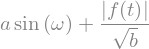

In [23]:
a, omega, b, t = sym.symbols('a, omega, b, t')
f = sym.Function('f')
expr3 = a*sym.sin(omega) + sym.Abs(f(t))/sym.sqrt(b)
expr3

And you have some values for which you want to evaluate of the expression:

In [24]:
values = {omega: sym.pi/4, a: 2, f(t): -12, b: 25}

You can evalute the expression using `sym.subs`:

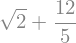

In [25]:
expr3.subs(values)

Notice how the square root and fraction do not automatically reduce to their decimal equivalents. To do so, you must use the `evalf()` method:

In [26]:
expr3.subs(values).evalf()

To obtain machine precision floating point numbers directly and with more flexibility, it is better to use the `sym.lambdify()` function to convert the expression to a Python function. When using `sym.lambdify()`, all symbols and functions should be converted to numbers, so first identify what symbols and functions make up the expression.

In [27]:
eval_expr3 = sym.lambdify((omega, a, f(t), b), expr3)

`sym.lambdify()` generates a Python function and, in this case, we store that function in the variable `eval_expr3`. You can see what the inputs and outputs of the function are with `help()`:

In [28]:
help(eval_expr3)

Help on function _lambdifygenerated:

_lambdifygenerated(omega, a, _Dummy_38, b)
    Created with lambdify. Signature:
    
    func(omega, a, f, b)
    
    Expression:
    
    a*sin(omega) + Abs(f(t))/sqrt(b)
    
    Source code:
    
    def _lambdifygenerated(omega, a, _Dummy_38, b):
        return a*sin(omega) + abs(_Dummy_38)/sqrt(b)
    
    
    Imported modules:



This function operates on and returns floating point values. However, it also support arrays of floats. For example:

In [29]:
eval_expr3(3.14/4, 2, -12, [25, 26, 27])

array([3.81365036, 3.76704398, 3.72305144])

:::{card} Test yourself!

Create a symbolic expression representing [Newton's Law of Universal Gravitation](https://en.wikipedia.org/wiki/Newton's_law_of_universal_gravitation). Use `sym.lambdify()` to evaluate the expression for two mass of 5.972E24 kg and 80 kg at a distance of 6371 km apart to find the gravitational force in Newtons. $G$ equals $6.67430\cdot 10 ^{-11}$

All variables have been defined with:
```python
G, m_1, m_2, r = sym.symbols('G, m_1, m_2, r')
```

Click {fa}`rocket` --> {guilabel}`Live Code` to activate live coding!
:::



In [30]:
from math import isclose
G, m_1, m_2, r = sym.symbols('G, m_1, m_2, r')
F = G*m_1*m_2/r**2
eval_F = sym.lambdify((G, m_1, m_2, r), F)
answer_correct = eval_F(6.67430E-11, 5.972E24, 80, 6371E3)
answer = 0

tolerance = 0.001
check_float = lambda a, b: isclose(a, b, rel_tol=0, abs_tol=tolerance)

In [104]:
answer = 

In [31]:
check_answer("answer",answer_correct, check_float)

Button(description='Check answer', style=ButtonStyle())

Output()

## Some examples

SymPy has many possibilities. Check out the [documentation](https://docs.sympy.org/latest/index.html) if you're curious. Some examples are shown below.

Take the derivative of $\sin\left({x}\right) e ^ x$

In [32]:
sym.diff(sym.sin(x)*sym.exp(x),x)

Compute $\int(e^x\sin{(x)} + e^x\cos{(x)})dx$.

In [33]:
sym.integrate(sym.exp(x)*sym.sin(x) + sym.exp(x)*sym.cos(x), x)

Compute $\int_{-\infty}^\infty \sin{(x^2)}dx$.

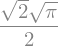

In [34]:
sym.integrate(sym.sin(x**2), (x, -sym.oo, sym.oo))

Find $\lim_{x\to 0}\frac{\sin{(x)}}{x}$.

In [35]:
sym.limit(sym.sin(x)/x, x, 0)

Solve $x^2 - 2 = 0$.

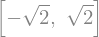

In [36]:
sym.solve(sym.Eq(x**2 - 2,0), x)

Find the eigenvalues of $\left[\begin{smallmatrix}1 & 2\\2 & 2\end{smallmatrix}\right]$.

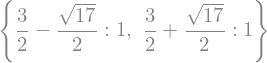

In [37]:
sym.Matrix([[1, 2], [2, 2]]).eigenvals()

Print $\int_{0}^{\pi} \cos^{2}{\left (x \right )} dx$ using $\mathrm{LaTeX}$.

In [38]:
sym.latex(sym.Integral(sym.cos(x)**2, (x, 0, sym.pi)))

'\\int\\limits_{0}^{\\pi} \\cos^{2}{\\left(x \\right)}\\, dx'

## Gotchas
Trial and error is an approach for many programmers, but you may want to prevent frequently made mistakes. Take a look at SymPy's documentation on [gotchas](https://docs.sympy.org/latest/tutorials/intro-tutorial/gotchas.html) to accelerate your learning!

## References
```{bibliography}